# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [18]:
df = pd.read_csv(r"C:\Users\Z E Y T O N\Desktop\Q-final-project\QBC-DA10-Group4-FinalProject\ML_Q1.csv")

print(df.shape)
print(df.columns.tolist())
print(df.isnull().sum())
df.head()

(30000, 16)
['Order ID', 'Product ID', 'Category', 'Sub-Category', 'Quantity', 'Profit', 'Shipping Cost', 'Return ID', 'Discount', 'Order Priority', 'Segment', 'mmonthN', 'MquarterN', 'MWeekNum', 'Sales', 'Markets']
Order ID              0
Product ID            0
Category              0
Sub-Category          0
Quantity              0
Profit                0
Shipping Cost         0
Return ID         28023
Discount              0
Order Priority        0
Segment               0
mmonthN               0
MquarterN             0
MWeekNum              0
Sales                 0
Markets               0
dtype: int64


,Order ID,Product ID,Category,Sub-Category,Quantity,Profit,Shipping Cost,Return ID,Discount,Order Priority,Segment,mmonthN,MquarterN,MWeekNum,Sales,Markets
0,AE-2011-9160,OFF-FEL-10001405,Office Supplies,Storage,2,-157.085999,5.690000,NaN,0.7,Medium,Consumer,10,4,41,82.674004,EMEA
1,AE-2011-9160,TEC-EPS-10004171,Technology,Machines,6,-88.991997,3.870000,NaN,0.7,Medium,Consumer,10,4,41,78.407997,EMEA
2,AE-2013-1130,FUR-BUS-10003055,Furniture,Bookcases,6,-232.272003,60.080002,NaN,0.7,High,Consumer,10,4,42,224.748001,EMEA
3,AE-2013-1130,OFF-ACC-10004278,Office Supplies,Fasteners,1,-4.692000,0.100000,NaN,0.7,High,Consumer,10,4,42,4.248000,EMEA
4,AE-2013-1530,OFF-STI-10000114,Office Supplies,Supplies,2,-29.472000,1.410000,NaN,0.7,High,Corporate,12,4,53,16.667999,EMEA


In [19]:
df1 = df.copy()

#column names cleaning:
df1.columns = df1.columns.str.replace(' ', '_')

print(df1.columns.tolist())

['Order_ID', 'Product_ID', 'Category', 'Sub-Category', 'Quantity', 'Profit', 'Shipping_Cost', 'Return_ID', 'Discount', 'Order_Priority', 'Segment', 'mmonthN', 'MquarterN', 'MWeekNum', 'Sales', 'Markets']


In [20]:
# drop returned orders :
df1 = df1[df1['Return_ID'].isna()]

In [21]:
# Drop useless columns :
df1 = df1.drop(['Order_ID', 'Product_ID', 'MquarterN', 'MWeekNum'], axis=1, errors='ignore')


print(df1.columns.tolist())
print(df1.shape)
df1.info()
df1.head()

['Category', 'Sub-Category', 'Quantity', 'Profit', 'Shipping_Cost', 'Return_ID', 'Discount', 'Order_Priority', 'Segment', 'mmonthN', 'Sales', 'Markets']
(28023, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 28023 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        28023 non-null  object 
 1   Sub-Category    28023 non-null  object 
 2   Quantity        28023 non-null  int64  
 3   Profit          28023 non-null  float64
 4   Shipping_Cost   28023 non-null  float64
 5   Return_ID       0 non-null      object 
 6   Discount        28023 non-null  float64
 7   Order_Priority  28023 non-null  object 
 8   Segment         28023 non-null  object 
 9   mmonthN         28023 non-null  int64  
 10  Sales           28023 non-null  float64
 11  Markets         28023 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.8+ MB


,Category,Sub-Category,Quantity,Profit,Shipping_Cost,Return_ID,Discount,Order_Priority,Segment,mmonthN,Sales,Markets
0,Office Supplies,Storage,2,-157.085999,5.690000,NaN,0.7,Medium,Consumer,10,82.674004,EMEA
1,Technology,Machines,6,-88.991997,3.870000,NaN,0.7,Medium,Consumer,10,78.407997,EMEA
2,Furniture,Bookcases,6,-232.272003,60.080002,NaN,0.7,High,Consumer,10,224.748001,EMEA
3,Office Supplies,Fasteners,1,-4.692000,0.100000,NaN,0.7,High,Consumer,10,4.248000,EMEA
4,Office Supplies,Supplies,2,-29.472000,1.410000,NaN,0.7,High,Corporate,12,16.667999,EMEA


In [22]:
# drop Return_ID column too now:
df1 = df1.drop(['Return_ID'], axis=1)

In [23]:
# Check duplicates:
duplicates = df1.duplicated().sum()
print("duplicate:", duplicates)

df1 = df1.drop_duplicates()
print(df1.shape)

duplicate: 1
(28022, 11)


In [24]:
df1.describe() # statistics for numeric columns

,Quantity,Profit,Shipping_Cost,Discount,mmonthN,Sales
count,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,3.589216,39.347786,28.882297,0.115382,7.469167,273.593572
std,2.253345,180.724250,62.169543,0.174689,3.320807,543.685043
min,1.000000,-6599.979980,0.010000,0.000000,1.000000,0.556000
25%,2.000000,1.760800,2.890000,0.000000,5.000000,34.290001
50%,3.000000,11.610000,8.650000,0.000000,8.000000,95.279999
75%,5.000000,42.599998,26.559999,0.200000,10.000000,274.994247
max,14.000000,8399.980469,933.570007,0.850000,12.000000,22638.500000


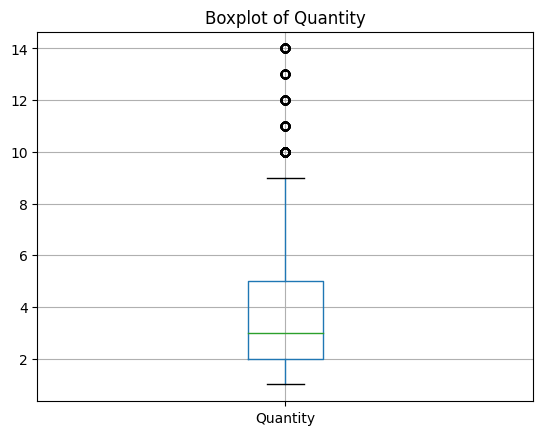

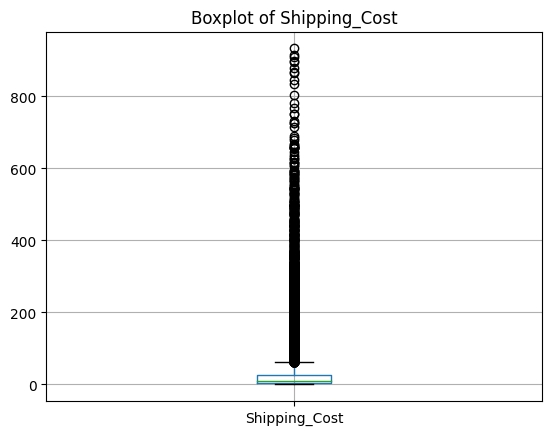

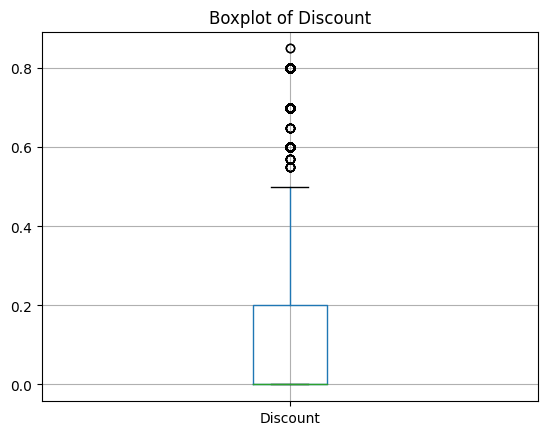

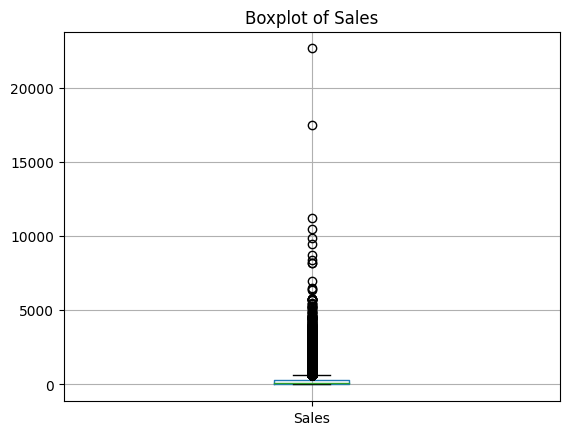

In [25]:
numeric_cols = ['Quantity', 'Shipping_Cost', 'Discount', 'Sales']

for col in numeric_cols:
    plt.figure()
    df1.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [26]:
# log transformation for outliers:
numeric_cols = ['Profit', 'Sales', 'Shipping_Cost']

for col in numeric_cols:
    # sign to handle (-) values
    df1[col] = np.sign(df1[col]) * np.log1p(abs(df1[col]))

df1[numeric_cols].describe()

,Profit,Sales,Shipping_Cost
count,28022.000000,28022.000000,28022.000000
mean,1.896898,4.611632,2.411738
std,2.829408,1.429254,1.329938
min,-8.794973,0.442118,0.009950
25%,1.015520,3.563600,1.358409
50%,2.534490,4.567261,2.266958
75%,3.775057,5.620380,3.316365
max,9.036104,10.027451,6.840087


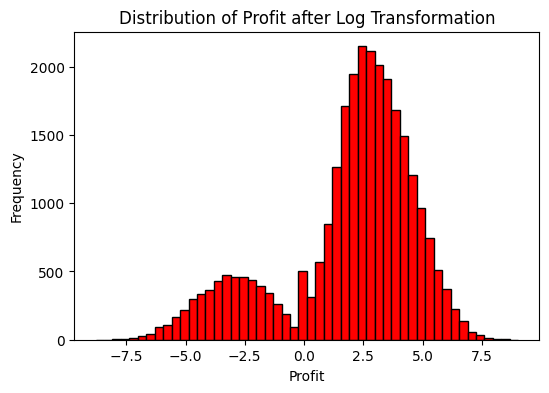

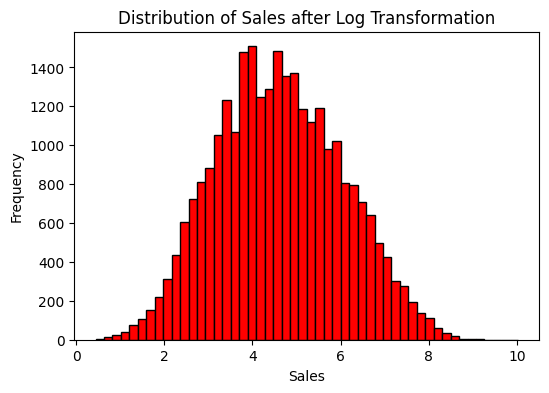

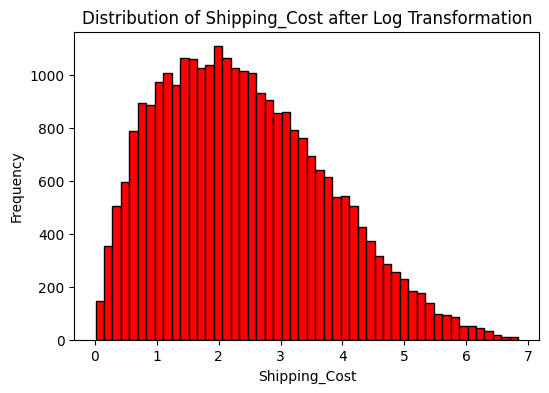

In [27]:
numeric_cols = ['Profit', 'Sales', 'Shipping_Cost']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df1[col], bins=50, color='red', edgecolor='black')
    plt.title(f'Distribution of {col} after Log Transformation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [28]:
# Encoding categorical columns directly on df1
from sklearn.preprocessing import LabelEncoder

# Label Encoding:
label_cols = ['Order_Priority', 'Markets']
le = LabelEncoder()

for col in label_cols:
    df1[col] = le.fit_transform(df1[col])

# One-Hot Encoding :
ohe_cols = ['Category', 'Sub-Category', 'Segment']
df1 = pd.get_dummies(df1, columns=ohe_cols, drop_first=True, dtype=int)

print(df1.shape)
df1.head()

(28022, 28)


,Quantity,Profit,Shipping_Cost,Discount,Order_Priority,mmonthN,Sales,Markets,Category_Office Supplies,Category_Technology,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Segment_Corporate,Segment_Home Office
0,2,-5.063139,1.900614,0.7,3,10,4.426928,3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6,-4.499721,1.583094,0.7,3,10,4.374599,3,0,1,...,0,0,1,0,0,0,0,0,0,0
2,6,-5.452205,4.112185,0.7,1,10,5.419419,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.739062,0.095310,0.7,1,10,1.657847,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-3.416808,0.879627,0.7,1,12,2.871755,3,1,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
# Clean column names again :
df1.columns = df1.columns.str.replace(' ', '_')

print(df1.columns.tolist())

['Quantity', 'Profit', 'Shipping_Cost', 'Discount', 'Order_Priority', 'mmonthN', 'Sales', 'Markets', 'Category_Office_Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes', 'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables', 'Segment_Corporate', 'Segment_Home_Office']


In [30]:
df1.head()

,Quantity,Profit,Shipping_Cost,Discount,Order_Priority,mmonthN,Sales,Markets,Category_Office_Supplies,Category_Technology,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Segment_Corporate,Segment_Home_Office
0,2,-5.063139,1.900614,0.7,3,10,4.426928,3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6,-4.499721,1.583094,0.7,3,10,4.374599,3,0,1,...,0,0,1,0,0,0,0,0,0,0
2,6,-5.452205,4.112185,0.7,1,10,5.419419,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.739062,0.095310,0.7,1,10,1.657847,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-3.416808,0.879627,0.7,1,12,2.871755,3,1,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
output_path = "cleaned_data_Q1.csv"
df1.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f" Data saved: {output_path}")
print("Shape:", df1.shape)

 Data saved: cleaned_data_Q1.csv
Shape: (28022, 28)
